## PtyPy moonflower example
#### scan model: BlockFull
#### engine: Relaxed Averaged Alternate Projections (RAAR)

In [1]:
from ptypy.core import Ptycho
from ptypy import utils as u

In [2]:
# create parameter tree
p = u.Param()

In [3]:
# set verbose level to interactive
p.verbose_level = "interactive"

In [4]:
# set home path and io settings (no files saved)
p.io = u.Param()
p.io.rfile = None
p.io.autosave = u.Param(active=False)
p.io.interaction = u.Param(active=False)

In [5]:
p.io.autoplot = u.Param()
p.io.autoplot.active = True
p.io.autoplot.threaded = False
p.io.autoplot.layout = "jupyter"
p.io.autoplot.interval = 1

In [6]:
# max 200 frames (128x128px) of diffraction data
p.scans = u.Param()
p.scans.MF = u.Param()
p.scans.MF.name = 'BlockFull'
p.scans.MF.data= u.Param()
p.scans.MF.data.name = 'MoonFlowerScan'
p.scans.MF.data.shape = 128
p.scans.MF.data.num_frames = 200
p.scans.MF.data.save = None
p.scans.MF.data.density = 0.2
p.scans.MF.data.photons = 1e8
p.scans.MF.data.psf = 0.

### Load/prep data and save initial state

In [7]:
# Load and prepare
P = Ptycho(p,level=4)
# Save initial state
init_state = P.dump_current_state()

BlockFull: loading data for scan MF (161 diffraction frames, 161 PODs, 1 probe(s) and 1 object(s))
BlockFull: loading data for scan MF (reformatting probe/obj/exit)
BlockFull: loading data for scan MF (initializing probe/obj/exit)


### Run RAAR with beta = 0.9 and save the final state

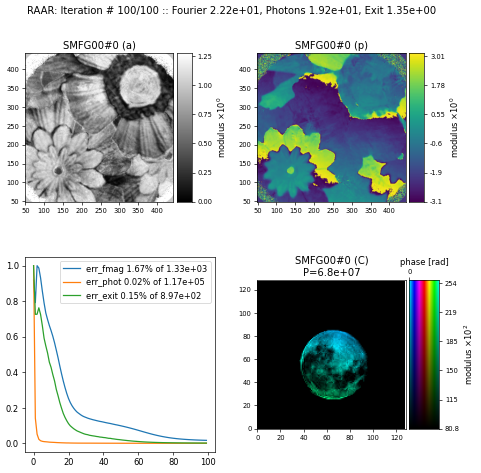

<Figure size 640x480 with 0 Axes>

In [8]:
# RAAR reconstrucion engine
engine_pars = u.Param()
engine_pars.name = 'RAAR'
engine_pars.numiter = 100
engine_pars.beta = 0.9
P.run(epars=engine_pars)

In [9]:
raar_0_9_state = P.dump_current_state()

### Run RAAR with beta = 0.7 and save the final state

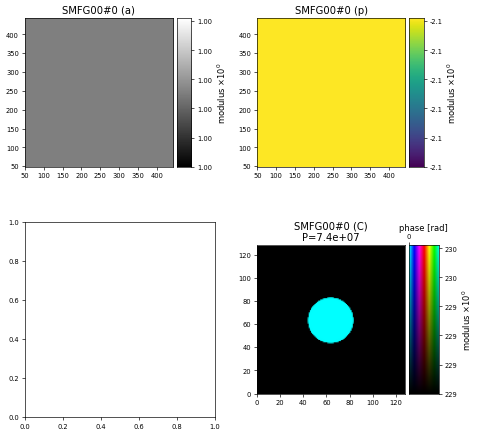

In [10]:
P.restore_state(init_state)
# Check that we are indeed starting from beginning again
fig = u.plot_client.figure_from_ptycho(P)

In [11]:
# RAAR reconstrucion engine
engine_pars = u.Param()
engine_pars.name = 'RAAR'
engine_pars.numiter = 100
engine_pars.beta = 0.7

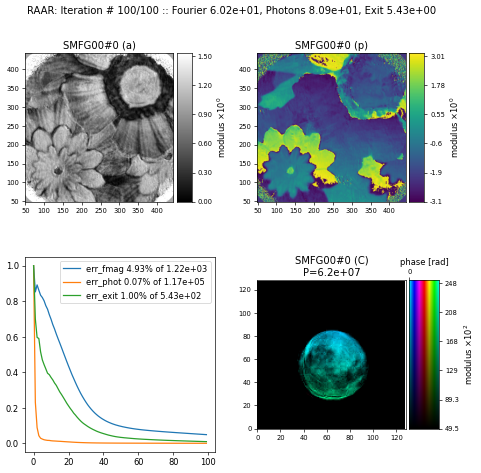

<Figure size 640x480 with 0 Axes>

In [12]:
P.run(epars=engine_pars)

In [13]:
raar_0_7_state = P.dump_current_state()

### Compare reconstructions with different beta

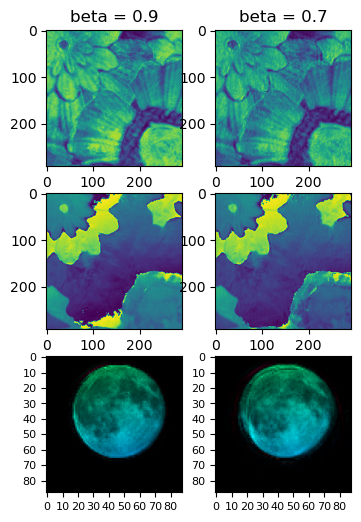

In [14]:
import numpy as np
import matplotlib.pyplot as plt
fig, axes = plt.subplots(ncols=2, nrows=3, figsize=(4,6))
axes[0,0].set_title("beta = 0.9")
axes[0,0].imshow(np.abs(raar_0_9_state.obj["SMFG00"]["data"][0,100:-100,100:-100]))
axes[1,0].imshow(np.angle(raar_0_9_state.obj["SMFG00"]["data"][0,100:-100,100:-100]))
ax10 = u.PtyAxis(axes[2,0], channel="c")
ax10.set_data(raar_0_9_state.probe["SMFG00"]["data"][0,20:-20,20:-20])
axes[0,1].set_title("beta = 0.7")
axes[0,1].imshow(np.abs(raar_0_7_state.obj["SMFG00"]["data"][0,100:-100,100:-100]))
axes[1,1].imshow(np.angle(raar_0_7_state.obj["SMFG00"]["data"][0,100:-100,100:-100]))
ax11 = u.PtyAxis(axes[2,1], channel="c")
ax11.set_data(raar_0_7_state.probe["SMFG00"]["data"][0,20:-20,20:-20])

In [26]:
iters_0_7 = np.array([it["iterations"] for it in raar_0_7_state.runtime["iter_info"]])
error_0_7 = np.array([it["error"] for it in raar_0_7_state.runtime["iter_info"]])

In [28]:
iters_0_9 = np.array([it["iterations"] for it in raar_0_9_state.runtime["iter_info"]])
error_0_9 = np.array([it["error"] for it in raar_0_9_state.runtime["iter_info"]])

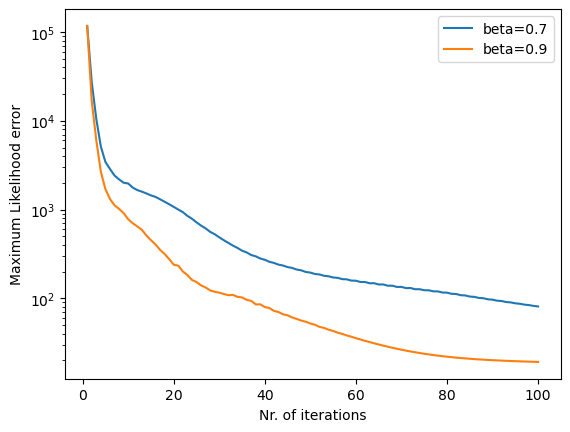

In [33]:
plt.figure()
plt.plot(iters_0_7, error_0_7[:,1], label="beta=0.7")
plt.plot(iters_0_9, error_0_9[:,1], label="beta=0.9")
plt.semilogy()
plt.ylabel("Maximum Likelihood error")
plt.xlabel("Nr. of iterations")
plt.legend()
plt.show()